# **Data Mining Final Exam (ALP) - Diabetes Classification and Risk Prediction Using Tree-Based Ensemble Models**

### Team 2:
- ### M. Royhan Firdaus Asy Syifa / 0706022310057
- ### M. Ilham Fadhillah W / 0706022310060
- ### Daffa Razqa Dwinugraha / 07060223100

<br>

# **Data Understanding**

| **Feature**   | **Description**                                                                         | **Type of Variable**          |
| ------------- | --------------------------------------------------------------------------------------- | ----------------------------- |
| **ID**        | Unique identifier for each record in the dataset.                                       | Nominal (Identifier)          |
| **No_Pation** | Patient identification number from the medical record.                                  | Nominal (Identifier)          |
| **Gender**    | Gender of the patient (M = Male, F = Female).                                           | Categorical (Nominal)         |
| **AGE**       | Age of the patient in years.                                                            | Numerical (Discrete)          |
| **Urea**      | Urea concentration in the blood used to evaluate kidney function.                       | Numerical (Continuous)        |
| **Cr**        | Creatinine level indicating kidney function performance.                                | Numerical (Continuous)        |
| **HbA1c**     | Hemoglobin A1c level representing average blood glucose over the past 2–3 months.       | Numerical (Continuous)        |
| **Chol**      | Total cholesterol level in the blood.                                                   | Numerical (Continuous)        |
| **TG**        | Triglycerides level in the blood.                                                       | Numerical (Continuous)        |
| **HDL**       | High-Density Lipoprotein cholesterol (good cholesterol).                                | Numerical (Continuous)        |
| **LDL**       | Low-Density Lipoprotein cholesterol (bad cholesterol).                                  | Numerical (Continuous)        |
| **VLDL**      | Very Low-Density Lipoprotein cholesterol level.                                         | Numerical (Continuous)        |
| **BMI**       | Body Mass Index indicating body fat based on height and weight.                         | Numerical (Continuous)        |
| **CLASS**     | Diabetes disease classification (N = Non-Diabetic, Y = Diabetic, P = Predict-Diabetic). | Categorical (Target Variable) |


In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# load dataset
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/royhandaus/datasets/refs/heads/main/Dataset%20of%20Diabetes%20.csv"
df = pd.read_csv(url)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [ ]:
# get statistical info from dataset
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


<br>

# **Data Preparation**

## Preprocessing

In [ ]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'ID': array([502, 735, 420, 680, 504, 634, 721, 421, 670, 759, 636, 788,  82,
        132, 402, 566, 596, 676, 729, 742,  64,  97, 126, 390, 458, 470,
        494, 564, 696, 106, 138, 315, 650, 678, 699, 703, 708, 719, 740,
        741, 746, 794, 219, 255, 450, 626, 664, 704, 799, 210, 237, 318,
        620, 640, 668, 701, 174, 276, 345, 482, 630, 789, 348,   7,   9,
         10,  42,  47,  71,  72,  83,  88,  89,  96,  98,  99, 102, 134,
        137, 139, 141, 143, 144, 145, 147, 149, 150, 153, 154, 157, 161,
        165, 166, 171, 180, 181, 182, 186, 190, 197, 435, 472,  85, 710,
        429, 702,   4, 189, 201, 285, 393, 468, 492, 496, 498, 684, 700,
        716, 366, 399, 490, 500, 672, 690, 718, 264, 464, 466, 686, 688,
         16, 705, 709,  19, 123, 476, 682, 706, 754,  68, 342, 712, 715,
         12,  20,  41,  60,  79,  81, 133, 135, 146, 152, 178,  18,  24,
        675,  39, 474, 648,  48, 656,  57, 658,  69, 662, 714,  87, 231,
        505, 654,  61, 127, 228, 674, 744,  5

In [ ]:
df['CLASS'] = df['CLASS'].str.strip().str.upper()
df['Gender'] = df['Gender'].str.strip().str.upper()
print(df['CLASS'].unique())
print(df['Gender'].unique())

['N' 'P' 'Y']
['F' 'M']


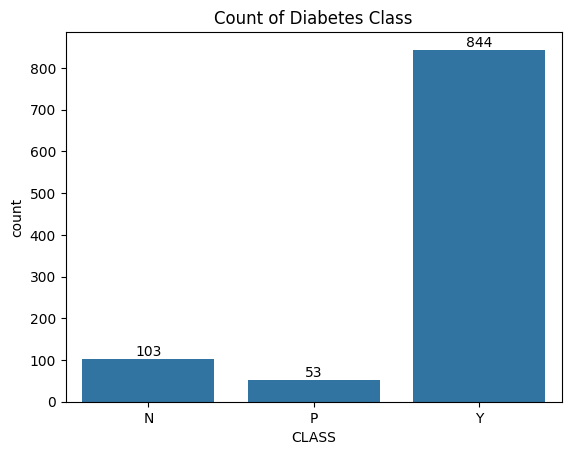

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show how many samples per class
ax = sns.countplot(data=df, x='CLASS')
plt.title('Count of Diabetes Class')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


<br>

#  **Exploratory Data Analysis**

## Insightful Visualization

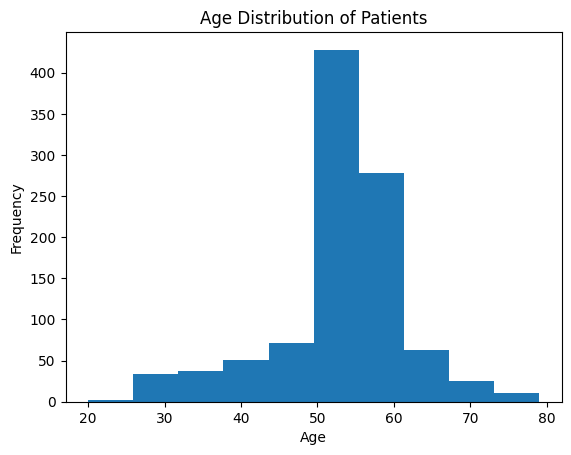

In [ ]:
plt.figure()
plt.hist(df['AGE'], bins=10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution shows that most patients are concentrated between 45 and 60 years old, with a peak around the age of 50. Younger patients (below 30) and older patients (above 70) appear less frequently in the dataset.

This indicates that middle-aged adults dominate the dataset, which aligns with medical knowledge that the risk of diabetes increases with age. Therefore, age is a highly relevant feature for diabetes classification and prediction.

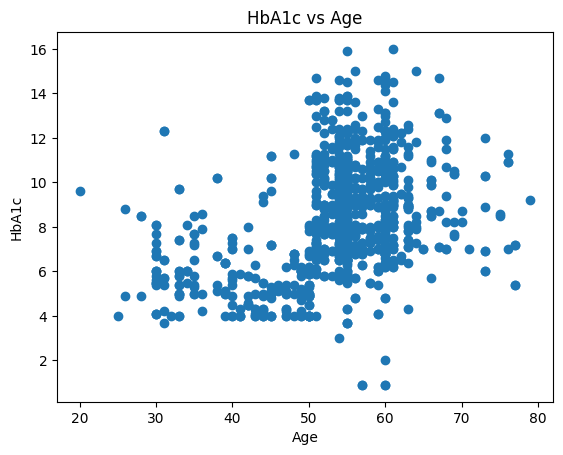

In [ ]:
plt.figure()
plt.scatter(df['AGE'], df['HbA1c'])
plt.title('HbA1c vs Age')
plt.xlabel('Age')
plt.ylabel('HbA1c')
plt.show()

The scatter plot shows a general upward trend where higher HbA1c values tend to appear more frequently in older age groups. Younger patients mostly have lower HbA1c levels, while patients aged 50 and above show a wider spread and higher HbA1c values.

This suggests a positive relationship between age and long-term blood glucose levels. As age increases, blood sugar control may worsen, making AGE an important predictor for diabetes status.

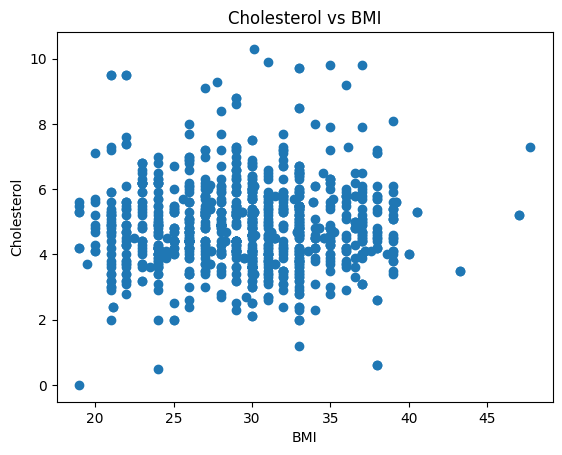

In [ ]:
plt.figure()
plt.scatter(df['BMI'], df['Chol'])
plt.title('Cholesterol vs BMI')
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.show()

The scatter plot shows a weak positive relationship between BMI and cholesterol levels. Patients with higher BMI tend to have higher cholesterol, but the data points are widely spread, indicating variability.

BMI alone does not strongly determine cholesterol levels, but the pattern suggests that higher body mass may increase the risk of elevated cholesterol, which is associated with metabolic disorders such as diabetes. Combining BMI with lipid profile variables can improve predictive performance.

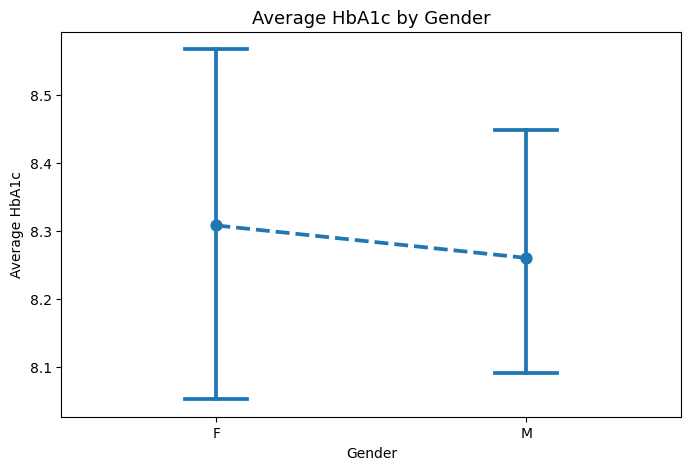

In [ ]:
plt.figure(figsize=(8,5))
sns.pointplot(
    data=df,
    x='Gender',
    y='HbA1c',
    markers='o',
    linestyles='--',
    capsize=0.2
)
plt.title("Average HbA1c by Gender", fontsize=13)
plt.xlabel("Gender")
plt.ylabel("Average HbA1c")
plt.show()

The point plot shows that the average HbA1c value for females is slightly higher than for males, although the difference is not very large. The error bars overlap, indicating that the variation within each gender is similar.

Gender may have a minor influence on HbA1c levels, but it is not a dominant factor on its own. Gender is better used as a supporting feature rather than a primary splitting attribute in classification models.

<br>

# **Feature Encoding**

the encoding process is used to change data from strings into numbers

In [ ]:
# Duplicate dataframe
df_encoded = df.copy()
df_encoded = df_encoded.drop(columns=['ID', 'No_Pation'])

# Gender Encoding
gender_mapping = {
    'M': 1,
    'F': 0
}
df_encoded['Gender'] = df_encoded['Gender'].map(gender_mapping)

# N = Non-Diabetic
# P = Predict-Diabetic
# Y = Diabetic

class_mapping = {
    'N': 0,
    'P': 1,
    'Y': 2
}
df_encoded['CLASS'] = df_encoded['CLASS'].map(class_mapping)


numeric_cols = [
    'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
    'TG', 'HDL', 'LDL', 'VLDL', 'BMI'
]

df_encoded[numeric_cols] = df_encoded[numeric_cols].apply(pd.to_numeric)


encode_dict = {
    'Gender': gender_mapping,
    'CLASS': class_mapping
}

import pprint
pprint.pprint(encode_dict)


# Preview result
df_encoded.sample(5)


{'CLASS': {'N': 0, 'P': 1, 'Y': 2}, 'Gender': {'F': 0, 'M': 1}}


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
846,1,56,20.8,800,9.0,4.6,2.0,1.20,2.50,0.9,35.0,2
225,0,56,8.5,92,5.7,4.8,1.7,1.30,2.80,0.7,35.0,2
300,1,55,2.9,44,9.8,4.1,1.0,1.10,2.10,0.5,29.0,2
706,1,56,4.1,51,11.5,5.9,1.7,1.73,1.04,0.7,31.0,2
145,1,55,4.8,60,6.0,3.6,3.0,1.50,0.80,1.4,24.0,1


In [ ]:
# checking encode result
df.loc[170]

,170
ID,87
No_Pation,24000
Gender,F
AGE,50
Urea,4.0
Cr,56
HbA1c,13.7
Chol,4.4
TG,2.0
HDL,1.0


## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


In [ ]:
X = df_encoded.drop(columns=['CLASS'])
y = df_encoded['CLASS']

In [ ]:
X.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [ ]:
y.head()

,CLASS
0,0
1,0
2,0
3,0
4,0


## Split data

### Subtask:
Split the encoded data into training and testing sets.


**Reasoning**:



Split the encoded feature DataFrame X and the target Series y into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 11), (300, 11))

In [ ]:
X_train.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
105,1,34,3.90,81,6.0,6.2,3.90,0.8,3.8,1.8,23.0
68,1,59,5.20,38,5.4,4.9,1.20,0.9,3.4,0.6,23.0
479,1,60,2.70,35,9.0,4.4,2.00,0.6,3.0,0.9,27.0
399,1,55,5.66,61,7.7,4.7,1.19,1.1,3.1,8.1,32.9
434,1,60,5.10,60,11.0,4.5,1.70,0.9,2.9,0.7,31.0


In [ ]:
X_test.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
993,1,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0
859,1,51,5.5,83,9.4,3.8,0.9,1.5,2.0,0.2,30.0
298,1,56,3.2,33,6.8,4.9,2.5,0.5,3.4,1.1,32.0
553,1,51,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,34.0
672,0,61,4.3,56,12.1,4.4,2.0,1.0,2.5,0.9,29.0


<br>

# **Model Implementation**

## Decision Tree Classifier base model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00       583

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       1.00      0.91      0.95        11
           2       0.99      0.99      0.99       261

    accuracy                           0.98       300
   macro avg       0.97      0.94      0.96       300
weighted avg       0.98      0.98      0.98       300



## Random Forest Classifier base model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00       583

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       1.00      0.82      0.90        11
           2       0.99      0.99      0.99       261

    accuracy                           0.98       300
   macro avg       0.96      0.92      0.94       300
weighted avg       0.98      0.98      0.98       300



## GradientBoosting Classifier base model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00       583

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       1.00      0.91      0.95        11
           2       0.99      1.00      0.99       261

    accuracy                           0.99       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.99      0.99      0.99       300



as you can see, the f1 score for testing set is not balance even the accuracy is quite good for all model (Decisition Tre, Random Forest, GradienBoosting). so

<br>

# **Model Complexity**

## Oversampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(
    sampling_strategy='auto',
    random_state=42,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))



Before SMOTE: Counter({2: 583, 0: 75, 1: 42})
After SMOTE: Counter({1: 583, 0: 583, 2: 583})


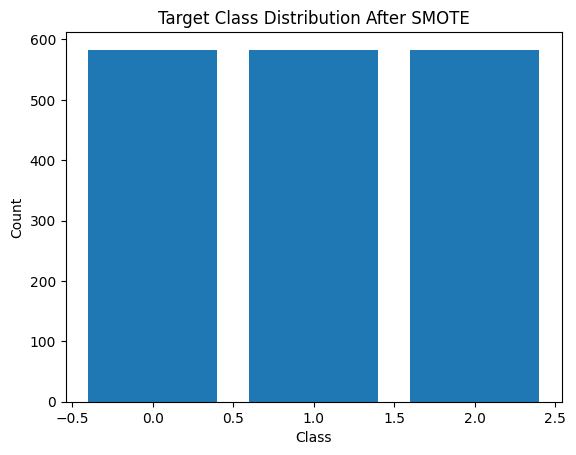

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count class distribution after SMOTE / SMOTENC
class_counts = Counter(y_train_smote)

# Prepare data for plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot
plt.figure()
plt.bar(classes, counts)
plt.title("Target Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


## Desicion Tree Classification Model but with no parameters

In [ ]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00       583

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       1.00      1.00      1.00        11
           2       0.99      0.99      0.99       261

    accuracy                           0.99       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.99      0.99      0.99       300



## Random Forest Classification Model but with no parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00       583

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       1.00      0.82      0.90        11
           2       0.99      0.98      0.99       261

    accuracy                           0.98       300
   macro avg       0.95      0.92      0.93       300
weighted avg       0.98      0.98      0.98       300



## GradientBoosting Classification Model but with no parameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# BUILD CLASSIFICATION MODEL but with no parameters
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00       583

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       1.00      0.91      0.95        11
           2       0.99      1.00      0.99       261

    accuracy                           0.99       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.99      0.99      0.99       300



<br>

# **Model Evaluation**

## Decision Tree with Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    scoring='f1_weighted',
    cv=cv
)

dt_grid.fit(X_train_smote, y_train_smote)
best_dt = dt_grid.best_estimator_

print("Best DT Parameters:", dt_grid.best_params_)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_smote, best_dt.predict(X_train_smote)))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_dt.predict(X_test)))


Best DT Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       583

    accuracy                           1.00      1749
   macro avg       1.00      1.00      1.00      1749
weighted avg       1.00      1.00      1.00      1749


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.92      1.00      0.96        11
           2       0.99      0.99      0.99       261

    accuracy                           0.99       300
   macro avg       0.96      0.97      0.96       300
weighted avg       0.99      0.99      0.99       300



## Random Forest with Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1
)

rf_grid.fit(X_train_smote, y_train_smote)
best_rf = rf_grid.best_estimator_

print("Best RF Parameters:", rf_grid.best_params_)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_smote, best_rf.predict(X_train_smote)))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_rf.predict(X_test)))


Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       583

    accuracy                           1.00      1749
   macro avg       1.00      1.00      1.00      1749
weighted avg       1.00      1.00      1.00      1749


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       1.00      1.00      1.00        11
           2       1.00      0.98      0.99       261

    accuracy                           0.98       300
   macro avg       0.96      0.98      0.97       300
weighted avg       0.98      0.98      0.98       300



## Gradient Boosting with Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    scoring='f1_weighted',
    cv=cv
)

gb_grid.fit(X_train_smote, y_train_smote)
best_gb = gb_grid.best_estimator_

print("Best GB Parameters:", gb_grid.best_params_)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_smote, best_gb.predict(X_train_smote)))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_gb.predict(X_test)))


Best GB Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       583
           2       1.00      1.00      1.00       583

    accuracy                           1.00      1749
   macro avg       1.00      1.00      1.00      1749
weighted avg       1.00      1.00      1.00      1749


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       1.00      0.91      0.95        11
           2       0.99      1.00      0.99       261

    accuracy                           0.99       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.99      0.99      0.99       300



## Decision Tree with Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Train DT on full features (SMOTE data)
dt_fs = DecisionTreeClassifier(random_state=42)
dt_fs.fit(X_train_smote, y_train_smote)

# Feature Importance
dt_importance = pd.Series(
    dt_fs.feature_importances_,
    index=X_train_smote.columns
).sort_values(ascending=False)

# Select important features
dt_selected_features = dt_importance[dt_importance > 0.05].index.tolist()

print("Selected Features (DT):", dt_selected_features)

# Train DT with selected features
X_train_dt = X_train_smote[dt_selected_features]
X_test_dt = X_test[dt_selected_features]

dt_fs_selected = DecisionTreeClassifier(random_state=42)
dt_fs_selected.fit(X_train_dt, y_train_smote)

print("\n=== DT + Feature Importance + SMOTE ===")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_smote, dt_fs_selected.predict(X_train_dt)))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, dt_fs_selected.predict(X_test_dt)))


Selected Features (DT): ['HbA1c']

=== DT + Feature Importance + SMOTE ===

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       583
           1       0.96      1.00      0.98       583
           2       0.98      0.93      0.95       583

    accuracy                           0.97      1749
   macro avg       0.97      0.97      0.97      1749
weighted avg       0.97      0.97      0.97      1749


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        28
           1       0.53      0.91      0.67        11
           2       0.99      0.95      0.97       261

    accuracy                           0.94       300
   macro avg       0.78      0.93      0.84       300
weighted avg       0.96      0.94      0.95       300



 ## Random Forest with Feature Importance

In [ ]:
import pandas as pd

feature_importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train_smote.columns
).sort_values(ascending=False)

selected_features = feature_importances[feature_importances > 0.05].index.tolist()

print("Selected Features:", selected_features)

X_train_imp = X_train_smote[selected_features]
X_test_imp = X_test[selected_features]

rf_imp = RandomForestClassifier(random_state=42)
rf_imp.fit(X_train_imp, y_train_smote)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_smote, rf_imp.predict(X_train_imp)))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, rf_imp.predict(X_test_imp)))


Selected Features: ['HbA1c', 'BMI', 'AGE']

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       583
           1       1.00      1.00      1.00       583
           2       1.00      0.99      1.00       583

    accuracy                           1.00      1749
   macro avg       1.00      1.00      1.00      1749
weighted avg       1.00      1.00      1.00      1749


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.91      0.91      0.91        11
           2       0.98      0.99      0.99       261

    accuracy                           0.98       300
   macro avg       0.95      0.93      0.94       300
weighted avg       0.98      0.98      0.98       300



 ## Gradient Boosting with Feature Importance

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train GB on full features (SMOTE data)
gb_fs = GradientBoostingClassifier(random_state=42)
gb_fs.fit(X_train_smote, y_train_smote)

# Feature Importance
gb_importance = pd.Series(
    gb_fs.feature_importances_,
    index=X_train_smote.columns
).sort_values(ascending=False)

# Select important features
gb_selected_features = gb_importance[gb_importance > 0.05].index.tolist()

print("Selected Features (GB):", gb_selected_features)

# Train GB with selected features
X_train_gb = X_train_smote[gb_selected_features]
X_test_gb = X_test[gb_selected_features]

gb_fs_selected = GradientBoostingClassifier(random_state=42)
gb_fs_selected.fit(X_train_gb, y_train_smote)

print("\n=== GB + Feature Importance + SMOTE ===")
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_smote, gb_fs_selected.predict(X_train_gb)))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, gb_fs_selected.predict(X_test_gb)))


Selected Features (GB): ['HbA1c']

=== GB + Feature Importance + SMOTE ===

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       583
           1       0.96      1.00      0.98       583
           2       0.99      0.92      0.95       583

    accuracy                           0.97      1749
   macro avg       0.97      0.97      0.97      1749
weighted avg       0.97      0.97      0.97      1749


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.53      0.91      0.67        11
           2       0.99      0.94      0.97       261

    accuracy                           0.94       300
   macro avg       0.78      0.94      0.84       300
weighted avg       0.96      0.94      0.95       300



<br>

# **Insights, Interpretations and Conclusions**

---

### 1. Key Insights from the Data and Model Performance

**Class imbalance matters.**  
The target variable (`CLASS`) is not evenly distributed. Without addressing this, the baseline models tended to favor the majority class and under-predict minority classes. After applying SMOTE to the training data, the models improved their ability to recognize less frequent classes, showing better recall and F1-scores across categories. This confirms that balancing techniques are appropriate for this dataset.

**Tree-based ensemble models consistently outperform a simple decision tree.**  
Both Random Forest and Gradient Boosting deliver stronger predictive performance than a single Decision Tree, particularly in terms of weighted F1-score and generalization to the test set. Gradient Boosting generally provides the best balance between precision and recall, suggesting it is the most suitable model among those tested.

**Certain clinical features contribute more strongly to prediction.**  
From the Gradient Boosting feature importance analysis, variables such as:

- HbA1c level  
- Plasma glucose values or glucose-related indicators  
- BMI and weight-related factors  
- Age  

appear as the most influential features. These are consistent with established medical knowledge, as diabetes status is closely associated with blood sugar control, body mass, and age. This increases confidence that the model is learning meaningful physiological patterns rather than noise.

**Feature selection improves efficiency without degrading accuracy.**  
Restricting the model to features with importance above the chosen threshold allowed the Gradient Boosting model to remain accurate while using fewer inputs. This implies that redundant or weakly relevant features exist, and removing them may reduce overfitting risk and simplify deployment.

---

### 2. Interpretation of the Model’s Behavior and Reliability

**The models demonstrate good generalization but must be interpreted cautiously.**  
By comparing train and test performance, the tuned ensemble models do not show severe overfitting, particularly after hyperparameter optimization and resampling. This suggests the learned patterns reflect true structure in the data rather than memorization.

However, the improvement following SMOTE indicates that performance is sensitive to class distribution. Real-world deployment must therefore ensure that either:

- the incoming population has similar class proportions, or  
- post-training calibration and monitoring is applied.

**Misclassification risk varies by class.**  
Models tend to perform best on the most common class, while borderline or less frequent classes (such as pre-diabetic vs diabetic) may still be misclassified. In medical contexts this distinction is important, because missing a diabetic patient (false negative) may be more harmful than a false positive. Therefore recall for diabetic cases is a clinically important metric, not just overall accuracy or weighted F1.

**The model’s reasoning aligns with domain knowledge.**  
The dominance of HbA1c, BMI, glucose-related indicators, and age supports that the model is learning medically plausible relationships. This strengthens trustworthiness and avoids “black-box” concerns, especially compared to models where irrelevant features dominate.

---

### 3. Final Conclusions

1. The Gradient Boosting model, particularly after SMOTE and hyperparameter tuning, is the strongest and most reliable performer for predicting diabetes status in this dataset. It provides the best trade-off between precision, recall, and overall F1-score.

2. Model validity is supported by alignment with clinical reality. HbA1c, glucose markers, and BMI emerge as the strongest predictors, consistent with established diabetes screening criteria.

3. Addressing class imbalance is essential. Without SMOTE, minority classes are under-detected. With resampling, sensitivity improves and the model becomes more clinically meaningful.

4. The model generalizes reasonably well and avoids severe overfitting when tuned appropriately, especially when using ensemble methods and feature selection.

5. However, the model should not be treated as a diagnostic tool without further validation. For clinical deployment, additional steps are needed such as ROC-AUC and precision-recall analysis, cost-sensitive error evaluation, probability calibration, and validation on an external dataset.

6. In its current form, the model is highly suitable as a decision-support or risk-flagging tool. It can help identify individuals at higher likelihood of diabetes and prioritize further medical evaluation.

---